In [1]:
import tensorflow as tf
import keras
import cv2

In [2]:
import os, sys
os.listdir()

['tomatoe_onions',
 'MobileNET.ipynb',
 '=0.6.0',
 '.ipynb_checkpoints',
 'mobile_ssd_v2_float_coco.tflite']

# Image processing

In [18]:
os.chdir('/home/odemakinde/Desktop/Edge ML/mobileNET')
os.getcwd()

'/home/odemakinde/Desktop/Edge ML/mobileNET'

In [19]:
base_dir = '/tomatoe_onions'

In [20]:
from os import listdir
from os.path import isfile, join
mypath = 'tomatoe_onions/train/onions/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [21]:
onlyfiles

['IMG_20200716_030657_918.jpg',
 'IMG_20200716_030558_087.jpg',
 'IMG_20200716_030634_462.jpg',
 'IMG_20200716_030807_000.jpg',
 'IMG_20200716_031018_026.jpg',
 'IMG_20200716_030612_564.jpg',
 'IMG_20200716_030630_802.jpg',
 'IMG_20200716_030710_552.jpg',
 'IMG_20200716_030748_235.jpg',
 'IMG_20200716_031054_633.jpg',
 'IMG_20200716_030624_731.jpg',
 'IMG_20200716_030842_610.jpg',
 'IMG_20200716_031026_207.jpg',
 'IMG_20200716_030707_235.jpg',
 'IMG_20200716_030553_942.jpg',
 'IMG_20200716_030907_600.jpg',
 'IMG_20200716_030702_061.jpg',
 'IMG_20200716_030933_762.jpg',
 'IMG_20200716_030733_340.jpg',
 'IMG_20200716_030923_311.jpg',
 'IMG_20200716_030604_145.jpg',
 'IMG_20200716_030643_933.jpg',
 'IMG_20200716_031001_019.jpg',
 'IMG_20200716_031043_038.jpg',
 'IMG_20200716_031049_799.jpg',
 'IMG_20200716_031038_945.jpg',
 'IMG_20200716_030942_265.jpg',
 'IMG_20200716_030547_134.jpg',
 'IMG_20200716_030956_106.jpg',
 'IMG_20200716_031003_659.jpg',
 'IMG_20200716_030730_209.jpg',
 'IMG_20

In [29]:
train_dir = 'tomatoe_onions/train'
test_dir = 'tomatoe_onions/test'
default_dir = 'tomatoe_onions'
train_onion, train_tomatoe, test_onion, test_tomatoe = [], [],[],[]
def get_data():
    # get data's on training cat
    current_dir = train_dir+'/tomatoes/'
    train_tomatoe = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    #print(train_tomatoe)
    
    # get data's on training dog
    current_dir = train_dir +'/onions/'
    train_onion = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    
    # get data's on test cat
    current_dir = test_dir+'/tomatoes/'
    test_tomatoe = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    
    # get data's on test dog
    current_dir = test_dir +'/onions/'
    test_onion = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    return train_tomatoe, train_onion, test_tomatoe, test_onion

train_tomatoe, train_onion, test_tomatoe, test_onion = get_data()



In [30]:
len(train_tomatoe),len(train_onion),len(test_tomatoe),len(test_onion)

(37, 47, 10, 10)

In [50]:
os.getcwd()

'/home/odemakinde/Desktop/Edge ML/mobileNET/tomatoe_onions'

In [52]:
import numpy as np
np.random.seed(100)

import keras
from keras.preprocessing import image

train_images, train_target = [], []
for i in train_tomatoe:
    try:
        directory = "../"+train_dir + '/tomatoes/' + str(i)
        print(directory)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(0)
    except OSError as err:
        print(err)

for i in train_onion:
    try:
        directory = "../"+train_dir + '/onions/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(1)
    
    except OSError as err:

        continue
for i in test_tomatoes:
    try:
        directory = "../"+test_dir + '/tomatoes/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(0)
    except OSError as err:
        continue

for i in test_onion:
    try:
        directory = "../"+test_dir + '/onions/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(1)
    
    except OSError as err:
        pass



../tomatoe_onions/train/tomatoes/IMG_20200716_030046_536.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030208_293.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030159_910.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030016_534.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_025848_712.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030427_417.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030431_362.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030036_447.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030242_668.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030339_453.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_025932_796.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030337_011.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_025858_101.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030311_496.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030144_080.jpg
../tomatoe_onions/train/tomatoes/IMG_20200716_030317_240.jpg
../tomatoe_onions/train/

In [53]:
#image.load_img??

In [54]:
train_images = np.array(train_images)
train_target = np.array(train_target)
train_images.shape, train_target.shape

((94, 224, 224, 3), (94,))

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_target, train_size = 0.7, random_state = 42, stratify = train_target)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((65, 224, 224, 3), (29, 224, 224, 3), (65,), (29,))

In [59]:
y_train

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## trial

In [96]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


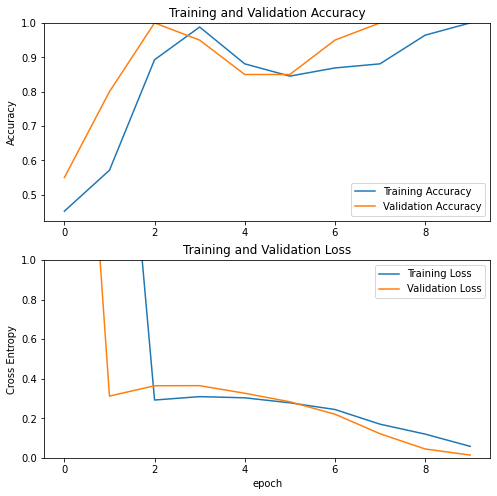

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [103]:
import matplotlib.pyplot as plt

In [105]:
im_path = r'/home/odemakinde/Desktop/Edge ML/mobileNET/tomatoe_onions/onions/IMG_20200716_031003_659.jpg'
from PIL import Image
image = Image.open(im_path)
# summarize some details about the image
im_arr = np.asarray(image)
im_arr = np.resize(im_arr, (224,224,3))/ 255.0
im_arr.shape

(224, 224, 3)

In [109]:
train_generator.class_indices

{'onions': 0, 'tomatoes': 1}

In [106]:
#print((im_arr))
result = model.predict(im_arr[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

1

# without transfer learning


In [86]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 110, 110, 8)       1032      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               2420100   
_________________________________________________________________
dense_5 (Dense)              (None, 50)               

In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [88]:
epochs = 10

history = model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test) ,batch_size=10)

Epoch 1/10
7/7 [==============================] - 1s 182ms/step - loss: 1.2855 - accuracy: 0.5692 - val_loss: 0.6550 - val_accuracy: 0.6207
Epoch 2/10
7/7 [==============================] - 1s 164ms/step - loss: 0.5556 - accuracy: 0.7538 - val_loss: 0.6113 - val_accuracy: 0.6897
Epoch 3/10
7/7 [==============================] - 1s 163ms/step - loss: 0.4352 - accuracy: 0.8462 - val_loss: 0.5174 - val_accuracy: 0.7241
Epoch 4/10
7/7 [==============================] - 1s 163ms/step - loss: 0.2965 - accuracy: 0.9231 - val_loss: 0.4076 - val_accuracy: 0.7931
Epoch 5/10
7/7 [==============================] - 1s 164ms/step - loss: 0.2097 - accuracy: 0.9385 - val_loss: 0.4538 - val_accuracy: 0.8621
Epoch 6/10
7/7 [==============================] - 1s 166ms/step - loss: 0.1348 - accuracy: 0.9692 - val_loss: 0.2591 - val_accuracy: 0.8276
Epoch 7/10
7/7 [==============================] - 1s 162ms/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 0.2391 - val_accuracy: 0.9310
Epoch 8/10
7/7 [====

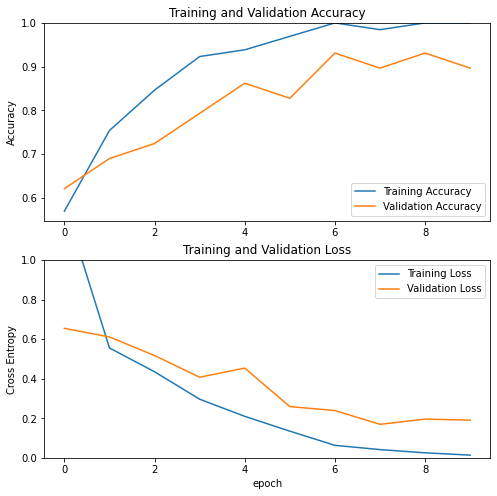

In [90]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [91]:
model.save('pure_model.h5')